<a href="https://colab.research.google.com/github/MiguelEuripedes/embedded_AI/blob/main/Projects/first_image_classifier/knn_classifier/fetch_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your First Image Classifier: Using k-NN to Classify Images

## Fetch Data

The purpose of this dataset is to correctly classify an image as containing a dog, cat, or panda. Containing only 3,000 images, the Animals dataset is meant to be another **introductory** dataset that we can quickly train a KNN model and obtain initial results (no so good accuracy) that has potential to be used as a baseline.

Let's take the following steps:

1. Load libraries
2. Fetch raw data
3. Upload raw data to W&B



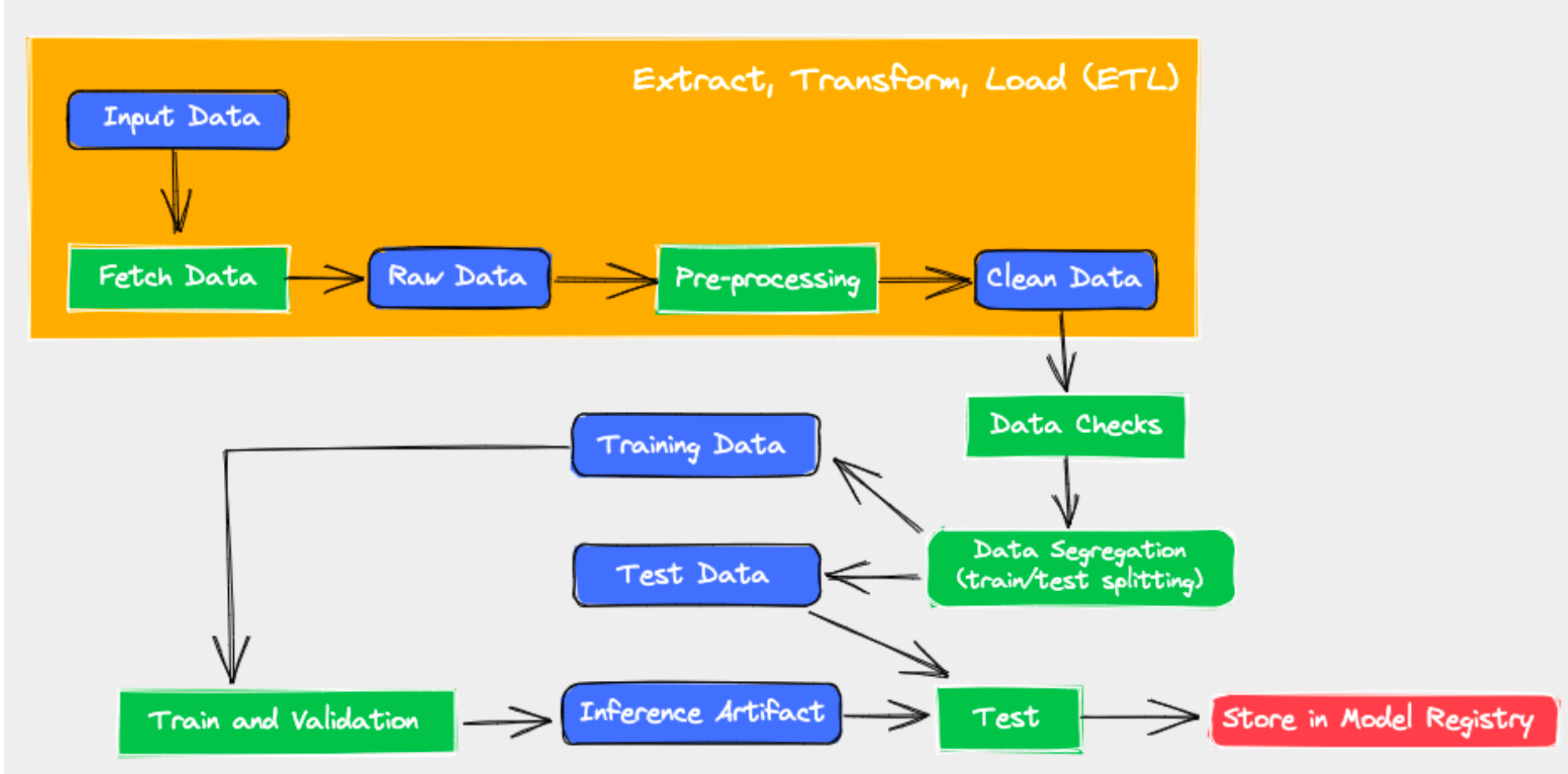

## Step 01: Setup

Start out by installing the experiment tracking library and **setting up your free W&B account**:

* **pip install wandb** – Install the W&B library
* **import wandb** – Import the wandb library
* **wandb login** – Login to your W&B account so you can log all your metrics in one place

In [ ]:
!pip install wandb -qU

     |████████████████████████████████| 1.9 MB 2.1 MB/s 
     |████████████████████████████████| 182 kB 66.2 MB/s 
     |████████████████████████████████| 162 kB 50.8 MB/s 
     |████████████████████████████████| 63 kB 1.7 MB/s 
     |████████████████████████████████| 162 kB 67.9 MB/s 
     |████████████████████████████████| 158 kB 70.0 MB/s 
     |████████████████████████████████| 157 kB 67.5 MB/s 
     |████████████████████████████████| 157 kB 64.8 MB/s 
     |████████████████████████████████| 157 kB 68.0 MB/s 
     |████████████████████████████████| 157 kB 56.5 MB/s 
     |████████████████████████████████| 157 kB 56.8 MB/s 
     |████████████████████████████████| 157 kB 56.5 MB/s 
     |████████████████████████████████| 157 kB 54.8 MB/s 
     |████████████████████████████████| 156 kB 55.8 MB/s 


In [ ]:
import wandb
wandb.login()

ERROR:wandb.jupyter:Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Download the code zip file


In [ ]:
# downloading the dataset

!gdown https://drive.google.com/uc?id=1drh-JoatOlE26bdFQZ-dubj2A_RB8MNQ
!unzip -qq dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1drh-JoatOlE26bdFQZ-dubj2A_RB8MNQ
To: /content/dataset.zip
100% 197M/197M [00:02<00:00, 91.4MB/s]


### Import Packages

In [ ]:
# import the necessary packages
from imutils import paths
import os
import logging

----

Configure Logging:
  
  Reference for a logging object

In [ ]:
logger = logging.getLogger()

Set level of Logging

In [ ]:
logger.setLevel(logging.INFO)

Create Handlers

In [ ]:
c_handler = logging.StreamHandler()

In [ ]:
c_format = logging.Formatter(fmt="%(asctime)s %(message)s", datefmt='%d-%m-%Y %H:%M:%S')

In [ ]:
c_handler.setFormatter(c_format)

Add handler to the Logger

In [ ]:
logger.handlers[0] = c_handler

## Step 02: Upload raw data

Since we are using Jupyter Notebooks we can replace our argument parsing code with *hard coded* arguments and valeus

In [ ]:
args = {
    "dataset":"animals",
    "project_name":"first_image_classifier",
    "artifact_name":"animals_raw_data"
}

Connecting to WandB

In [ ]:
run = wandb.init(entity="euripedes", project=args["project_name"], job_type="fetch_data")

wandb: Currently logged in as: euripedes. Use `wandb login --relogin` to force relogin


Create a artifact for all the raw data

In [ ]:
raw_data = wandb.Artifact(args["artifact_name"], type="raw_data")

Grab the list of images that we'll be describing

In [ ]:
logger.info("[INFO] loading images...")

12-10-2022 23:05:07 [INFO] loading images...


In [ ]:
imagePaths = list(paths.list_images(args["dataset"]))

Append all images to the artifact

In [ ]:
for img in imagePaths:
  "animals/dogs/dogs_0001.jpg > dogs/dogs_0001.jpg"
  label = img.split(os.path.sep)
  raw_data.add_file(img, name=os.path.join(label[-2], label[-1]))

Save artifact to W&B

In [ ]:
run.log_artifact(raw_data)

In [ ]:
run.finish()